In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# load dataset
df = pd.read_csv('movies_v2.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 635.4+ KB


In [4]:
# number of missing values
null = []
for i in df.columns:
    null.append(df[i].isnull().sum())

pd.DataFrame(null,index=df.columns,columns=['Missing Values'])

,Missing Values
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


In [5]:
# change data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
# create correct year column
df['released'] = df['released'].astype(str).str[:-16]
df['year_correct'] = df['released'].astype(str).str[-4:]

In [10]:
df.sort_values(by='gross',inplace=False,ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
3731,Avatar,PG-13,Action,2009,D,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,D
5302,Avengers: Endgame,PG-13,Action,2019,,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,
1795,Titanic,PG-13,Drama,1997,D,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,D
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,D,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,D
5158,Avengers: Infinity War,PG-13,Action,2018,,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,
5334,The Lion King,PG,Animation,2019,,6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,
4720,Jurassic World,PG-13,Action,2015,,7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,
4224,The Avengers,PG-13,Action,2012,,8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,
4713,Furious 7,PG-13,Action,2015,,7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,
5346,Frozen II,PG,Animation,2019,N,6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,N


In [11]:
df['company'].drop_duplicates().sort_values().head(15)

2850        "DIA" Productions GmbH & Co. KG
5375    "Weathering With You" Film Partners
1785                        .406 Production
1727                          1492 Pictures
216                        1818 Productions
2893                       19 Entertainment
5084                             1978 Films
4619       1984 Private Defense Contractors
2679                           2 Loop Films
5341                      2.0 Entertainment
3532                           2.4.7. Films
3014                       2003 Productions
5419                   20th Century Studios
4630                  21 Laps Entertainment
936           21st Century Film Corporation
Name: company, dtype: object

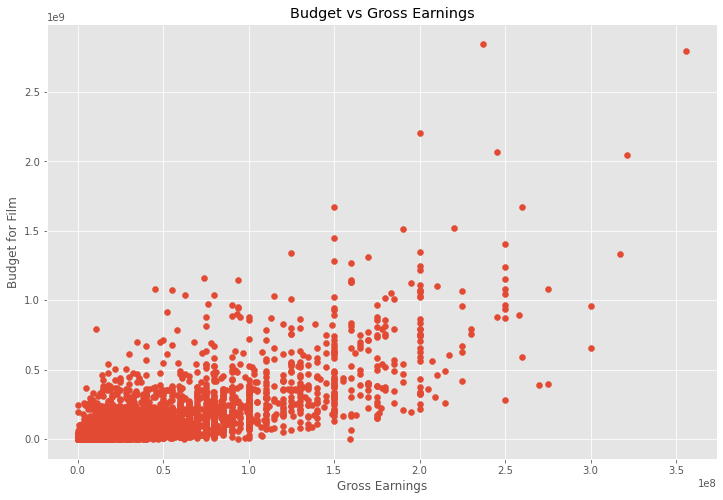

In [15]:
# scatterplot of budget vs gross
plt.figure(figsize=(12,8))
plt.scatter(x='budget',y='gross',data=df)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film');

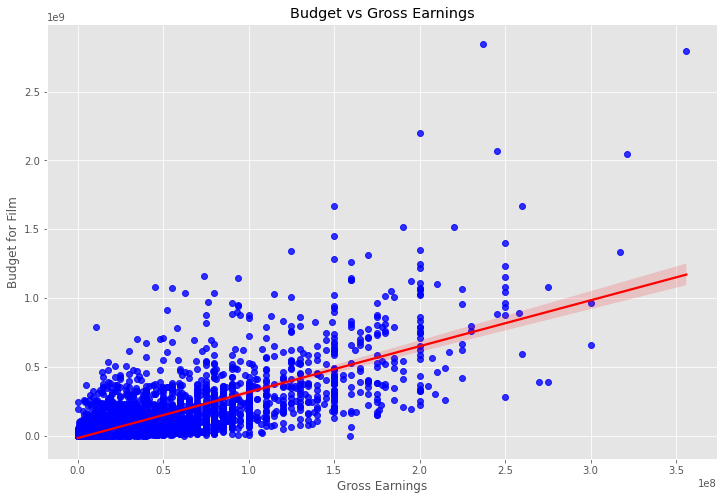

In [18]:
# regplot of budget vs gross
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film');

In [19]:
# correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


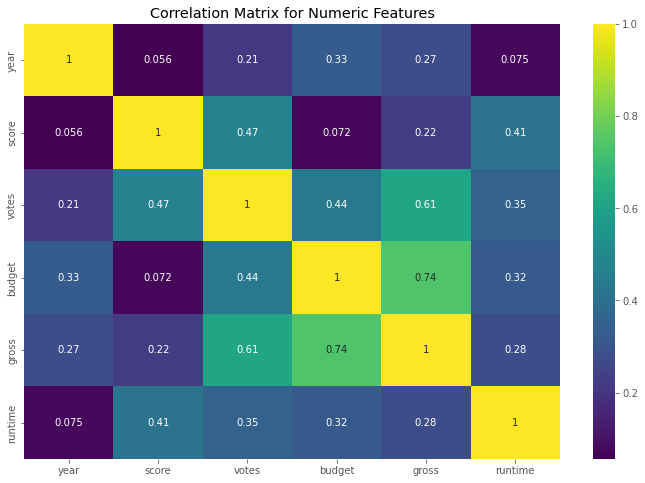

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.title('Correlation Matrix for Numeric Features');

In [23]:
df_numeric = df
for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype=='object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes
        
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,0,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,0,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,0,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,0,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,0,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0


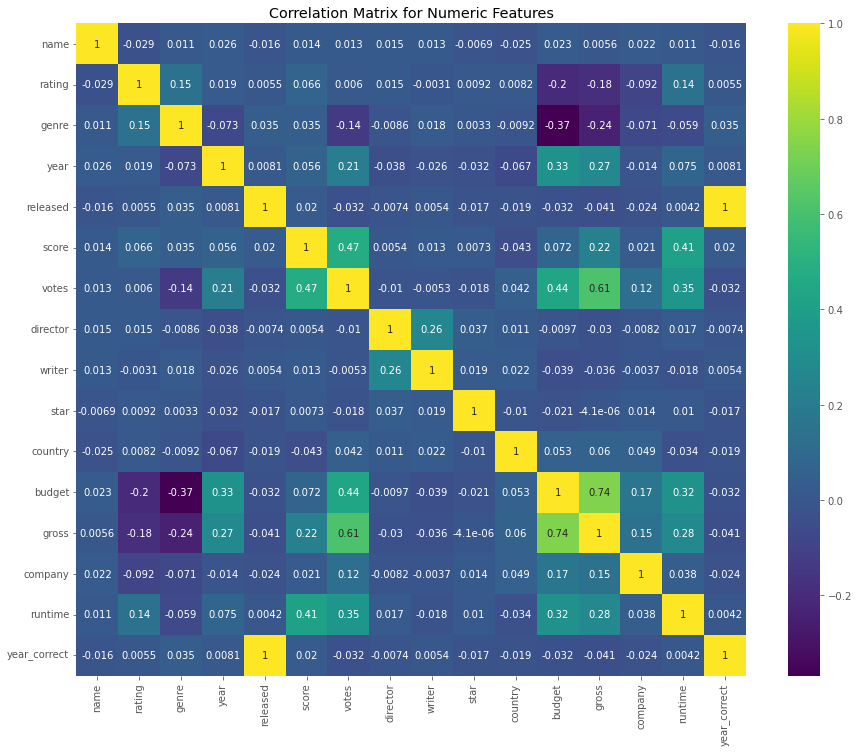

In [26]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.title('Correlation Matrix for Numeric Features');

In [27]:
df_numeric.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,0.025542,-0.015656,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.015656
rating,-0.029234,1.000000,0.147796,0.019499,0.005536,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.005536
genre,0.010996,0.147796,1.000000,-0.073167,0.034641,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.034641
year,0.025542,0.019499,-0.073167,1.000000,0.008085,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.008085
released,-0.015656,0.005536,0.034641,0.008085,1.000000,0.019827,-0.031761,-0.007428,0.005391,-0.016735,-0.019122,-0.031714,-0.040508,-0.024468,0.004232,1.000000
score,0.014450,0.065983,0.035106,0.056386,0.019827,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.019827
votes,0.012615,0.006031,-0.135990,0.206021,-0.031761,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,-0.031761
director,0.015246,0.014656,-0.008553,-0.038354,-0.007428,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.007428
writer,0.012880,-0.003149,0.017578,-0.025908,0.005391,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.005391
star,-0.006882,0.009196,0.003341,-0.032157,-0.016735,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.016735


In [28]:
correlation_mat = df_numeric.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.015656
                                ...   
year_correct  budget         -0.031714
              gross          -0.040508
              company        -0.024468
              runtime         0.004232
              year_correct    1.000000
Length: 256, dtype: float64

In [31]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(30)

budget        genre          -0.368523
genre         budget         -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
company       rating         -0.092357
rating        company        -0.092357
genre         year           -0.073167
year          genre          -0.073167
company       genre          -0.071334
genre         company        -0.071334
country       year           -0.066748
year          country        -0.066748
runtime       genre          -0.059237
genre         runtime        -0.059237
country       score          -0.043051
score         country        -0.043051
gross         year_correct   -0.040508
year_correct  gross          -0.040508
gross         released       -0.040508
released      gross      

In [37]:
high_corr = sorted_pairs[((sorted_pairs)>0.3) & (sorted_pairs<1.0)]
high_corr

runtime  budget     0.318695
budget   runtime    0.318695
year     budget     0.327722
budget   year       0.327722
runtime  votes      0.352303
votes    runtime    0.352303
runtime  score      0.414068
score    runtime    0.414068
votes    budget     0.439675
budget   votes      0.439675
score    votes      0.474256
votes    score      0.474256
gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings